In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import pickle
%matplotlib inline

In [2]:
train=pd.read_excel('C:/Users/aa/Desktop/dataset/Data_Train.xlsx')
sample = pd.read_excel('C:/Users/aa/Desktop/dataset/Sample_submission.xlsx')
test = pd.read_excel('C:/Users/aa/Desktop/dataset/Test_set.xlsx')

In [3]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
test = pd.concat([test,sample],axis=1)


In [5]:
test.head(10)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,15998
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,16612
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,25572
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,25778
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,16934
5,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,12:35 13 Jun,18h 20m,1 stop,In-flight meal not included,21051
6,Air India,12/03/2019,Banglore,New Delhi,BLR → TRV → DEL,07:30,22:35,15h 5m,1 stop,No info,17813
7,IndiGo,1/05/2019,Kolkata,Banglore,CCU → HYD → BLR,15:15,20:30,5h 15m,1 stop,No info,16060
8,IndiGo,15/03/2019,Kolkata,Banglore,CCU → BLR,10:10,12:55,2h 45m,non-stop,No info,16230
9,Jet Airways,18/05/2019,Kolkata,Banglore,CCU → BOM → BLR,16:30,22:35,6h 5m,1 stop,No info,20533


In [6]:
train.shape,test.shape,train.shape[0]/(train.shape[0]+test.shape[0])*100


((10683, 11), (2671, 11), 79.99850232140183)

In [7]:
df= pd.concat([train,test])
df.shape

(13354, 11)

In [8]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [9]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,14046
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,14086
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,22720
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,23544
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL → BOM → COK,04:55,19:15,14h 20m,1 stop,No info,27489


In [10]:
df.drop(labels=['Route','Duration','Additional_Info'],axis=1,inplace=True)

In [11]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302


In [12]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Total_Stops        1
Price              0
dtype: int64

In [13]:
df['Airline'].value_counts()

Jet Airways                          4746
IndiGo                               2564
Air India                            2192
Multiple carriers                    1543
SpiceJet                             1026
Vistara                               608
Air Asia                              405
GoAir                                 240
Multiple carriers Premium economy      16
Jet Airways Business                    8
Vistara Premium economy                 5
Trujet                                  1
Name: Airline, dtype: int64

In [14]:
df['Source'].value_counts(),df['Destination'].value_counts()

(Delhi       5682
 Kolkata     3581
 Banglore    2752
 Mumbai       883
 Chennai      456
 Name: Source, dtype: int64,
 Cochin       5682
 Banglore     3581
 Delhi        1582
 New Delhi    1170
 Hyderabad     883
 Kolkata       456
 Name: Destination, dtype: int64)

In [15]:
print(df.shape)
df.dropna(inplace=True)
print(df.shape)

(13354, 8)
(13353, 8)


In [16]:
df['Day']= df['Date_of_Journey'].str.split('/').str[0]
df['Month']= df['Date_of_Journey'].str.split('/').str[1]
df['Year']= df['Date_of_Journey'].str.split('/').str[2]

In [17]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,non-stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,01,03,2019


In [18]:
df['Total_Stops']=df['Total_Stops'].str.replace('non-','0 ')

In [19]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0 stop,3897,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,01,03,2019


In [20]:
df['Stops'] = df['Total_Stops'].str.split().str[0]
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Year,Stops
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0 stop,3897,24,03,2019,0
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,05,2019,2
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,06,2019,2
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,05,2019,1
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,01,03,2019,1


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13353 entries, 0 to 2670
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          13353 non-null  object
 1   Date_of_Journey  13353 non-null  object
 2   Source           13353 non-null  object
 3   Destination      13353 non-null  object
 4   Dep_Time         13353 non-null  object
 5   Arrival_Time     13353 non-null  object
 6   Total_Stops      13353 non-null  object
 7   Price            13353 non-null  int64 
 8   Day              13353 non-null  object
 9   Month            13353 non-null  object
 10  Year             13353 non-null  object
 11  Stops            13353 non-null  object
dtypes: int64(1), object(11)
memory usage: 1.3+ MB


In [22]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Dep_Time           0
Arrival_Time       0
Total_Stops        0
Price              0
Day                0
Month              0
Year               0
Stops              0
dtype: int64

In [23]:
df['Departure_Hour'] = df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute'] = df['Dep_Time'].str.split(':').str[1]

In [24]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Dep_Time,Arrival_Time,Total_Stops,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,24/03/2019,Banglore,New Delhi,22:20,01:10 22 Mar,0 stop,3897,24,03,2019,0,22,20
1,Air India,1/05/2019,Kolkata,Banglore,05:50,13:15,2 stops,7662,1,05,2019,2,05,50
2,Jet Airways,9/06/2019,Delhi,Cochin,09:25,04:25 10 Jun,2 stops,13882,9,06,2019,2,09,25
3,IndiGo,12/05/2019,Kolkata,Banglore,18:05,23:30,1 stop,6218,12,05,2019,1,18,05
4,IndiGo,01/03/2019,Banglore,New Delhi,16:50,21:35,1 stop,13302,01,03,2019,1,16,50


In [25]:
df['Day'] = df['Day'].astype(int)
df['Month'] = df['Month'].astype(int)
df['Year'] = df['Year'].astype(int)
df['Stops'] = df['Stops'].astype(int)
df['Departure_Hour'] = df['Departure_Hour'].astype(int)
df['Departure_Minute'] = df['Departure_Minute'].astype(int)


In [26]:
df.drop(['Date_of_Journey','Dep_Time','Arrival_Time','Total_Stops'],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50


In [27]:
df.Airline.value_counts().index

Index(['Jet Airways', 'IndiGo', 'Air India', 'Multiple carriers', 'SpiceJet',
       'Vistara', 'Air Asia', 'GoAir', 'Multiple carriers Premium economy',
       'Jet Airways Business', 'Vistara Premium economy', 'Trujet'],
      dtype='object')

In [28]:
source_dict = {y:x for x,y in enumerate(df.Source.value_counts().index.sort_values())}
source_dict

{'Banglore': 0, 'Chennai': 1, 'Delhi': 2, 'Kolkata': 3, 'Mumbai': 4}

In [29]:
df.Destination.value_counts().index.sort_values()

Index(['Banglore', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata', 'New Delhi'], dtype='object')

In [30]:
destination_dict = {'Banglore':0,'Cochin':1,'Delhi':2,'Kolkata': 3,'Hyderabad':4,'New Delhi':5}

In [31]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Airline_Encoded']= le.fit_transform(df['Airline'].values)

df3 = df[['Airline']].copy()
df3['Encoded']=df['Airline_Encoded']
df3=df3.drop_duplicates('Airline').reset_index().iloc[:,1:]
d5=df3.Airline.values
d6=df3.Encoded.values
airline_dict = dict(zip(d5,d6))

print(airline_dict)

{'IndiGo': 3, 'Air India': 1, 'Jet Airways': 4, 'SpiceJet': 8, 'Multiple carriers': 6, 'GoAir': 2, 'Vistara': 10, 'Air Asia': 0, 'Vistara Premium economy': 11, 'Jet Airways Business': 5, 'Multiple carriers Premium economy': 7, 'Trujet': 9}


In [32]:
df['Source_Encoded']=df['Source'].map(source_dict)
df['Destination_Encoded']=df['Destination'].map(destination_dict)

In [33]:
df.head()

,Airline,Source,Destination,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,IndiGo,Banglore,New Delhi,3897,24,3,2019,0,22,20,3,0,5
1,Air India,Kolkata,Banglore,7662,1,5,2019,2,5,50,1,3,0
2,Jet Airways,Delhi,Cochin,13882,9,6,2019,2,9,25,4,2,1
3,IndiGo,Kolkata,Banglore,6218,12,5,2019,1,18,5,3,3,0
4,IndiGo,Banglore,New Delhi,13302,1,3,2019,1,16,50,3,0,5


In [34]:
df = df.drop(['Airline','Source','Destination'],axis=1)
df.head()

,Price,Day,Month,Year,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
0,3897,24,3,2019,0,22,20,3,0,5
1,7662,1,5,2019,2,5,50,1,3,0
2,13882,9,6,2019,2,9,25,4,2,1
3,6218,12,5,2019,1,18,5,3,3,0
4,13302,1,3,2019,1,16,50,3,0,5


Feature Selection

In [35]:
from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel 
from sklearn.model_selection import train_test_split

In [36]:
df.shape

(13353, 10)

In [37]:
df_train = df[0:10600]
df_test = df[10600:]

In [38]:
X = df_train.drop(['Price'],axis=1)
y = df_train.Price

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
model = SelectFromModel(Lasso(alpha=0.005,random_state=0))
model.fit(X_train,y_train)

SelectFromModel(estimator=Lasso(alpha=0.005, random_state=0))

In [41]:
model.get_support(),model.get_params()

(array([ True,  True, False,  True,  True,  True,  True,  True,  True]),
 {'estimator__alpha': 0.005,
  'estimator__copy_X': True,
  'estimator__fit_intercept': True,
  'estimator__max_iter': 1000,
  'estimator__normalize': 'deprecated',
  'estimator__positive': False,
  'estimator__precompute': False,
  'estimator__random_state': 0,
  'estimator__selection': 'cyclic',
  'estimator__tol': 0.0001,
  'estimator__warm_start': False,
  'estimator': Lasso(alpha=0.005, random_state=0),
  'importance_getter': 'auto',
  'max_features': None,
  'norm_order': 1,
  'prefit': False,
  'threshold': None})

In [42]:
features_selected = X_train.columns[model.get_support()]
features_selected,X_train.shape,len(features_selected)

(Index(['Day', 'Month', 'Stops', 'Departure_Hour', 'Departure_Minute',
        'Airline_Encoded', 'Source_Encoded', 'Destination_Encoded'],
       dtype='object'),
 (7420, 9),
 8)

In [43]:
X_train = X_train.drop(['Year'],axis=1)
X_test = X_test.drop(['Year'],axis=1)

In [44]:
X_train.head()


,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
4003,1,5,1,16,30,4,3,0
217,1,6,0,1,30,3,0,2
1625,1,6,2,13,15,1,2,1
7636,9,5,0,13,55,1,4,4
4833,6,6,1,9,35,4,3,0


In [45]:
X_test.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
5790,12,3,0,14,20,3,3,0
4340,1,6,0,11,40,2,0,2
3028,24,6,0,10,10,3,0,2
3037,18,5,0,19,35,3,1,3
8784,9,5,0,13,15,8,4,4


In [46]:
import scipy.stats as stat
for x in list(X_train.columns):
    X_train[x] = stat.yeojohnson(X_train[x])[0]

for y in list(X_test.columns):
    X_test[y] = stat.yeojohnson(X_test[y])[0]
X_train.head()

,Day,Month,Stops,Departure_Hour,Departure_Minute,Airline_Encoded,Source_Encoded,Destination_Encoded
4003,0.862230,17.150202,0.797617,8.702532,9.157704,2.366125,3.663566,-0.000000
217,0.862230,23.469581,0.000000,0.887074,9.157704,1.927017,0.000000,0.955575
1625,0.862230,23.469581,1.376379,7.437352,6.011303,0.813911,2.328746,0.634250
7636,5.028138,17.150202,0.000000,7.437352,13.004745,0.813911,5.078516,1.315014
4833,3.726570,23.469581,0.797617,5.606341,10.025546,2.366125,3.663566,-0.000000


NameError: name 'lm' is not defined

###Feature Normalization

# Linear Regression

In [49]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [50]:
lm = LinearRegression()

In [51]:
lm.fit(X_train,y_train)

LinearRegression()

In [52]:
predictions = lm.predict(X_test)

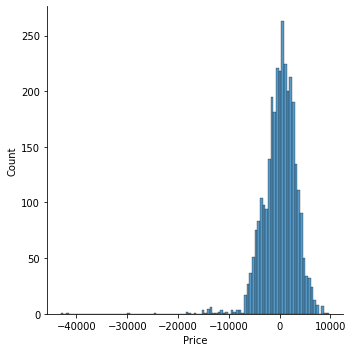

In [53]:
sns.displot(x=predictions-y_test)

<AxesSubplot:xlabel='Price', ylabel='Density'>

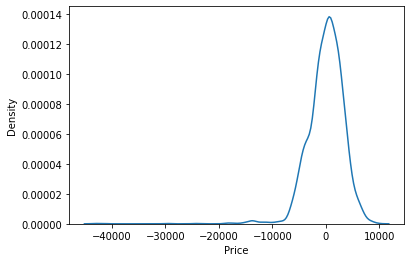

In [54]:
sns.kdeplot(x=predictions-y_test)

In [55]:
r2_score(y_true=y_test,y_pred=predictions)

0.44393013500989686

In [56]:
from sklearn.ensemble import RandomForestRegressor
reg=RandomForestRegressor()
reg.fit(X_train,y_train)
reg.score(X_train,y_train)

0.9206708544251183

In [57]:
y_pred = reg.predict(X_test)
r2_score(y_true=y_test,y_pred=y_pred)

0.7674014354108865

In [58]:
y_test

5790     4148
4340     3898
3028     3943
3037     3597
8784     2227
        ...  
4320     7888
1977     8479
916     16775
8800    16023
6561    13941
Name: Price, Length: 3180, dtype: int64

In [59]:
pred2 = lm.predict([np.array([2,3,3,7,5,3,3,5])])
pred2

C:\Users\aa\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([27410.7426978])